In [1]:
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns  
from sklearn import metrics 
from sklearn.feature_selection import SelectKBest, f_regression 
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split  
from sklearn.pipeline import make_pipeline  

In [2]:
# Loading data
df_math = pd.read_csv(r"C:\Users\DELL\Downloads\archive (1)\student\student-mat.csv", sep=';')
df_portuguese = pd.read_csv(r"C:\Users\DELL\Downloads\archive (1)\student\student-por.csv", sep=';')


In [3]:
df = df_math.rename(columns={
    'address': 'address_type',
    'famsize': 'family_size',
    'Pstatus': 'parent_cohabitation_status',
    'Medu': 'mother_education_level',
    'Fedu': 'father_education_level',
    'Mjob': 'mother_job',
    'Fjob': 'father_job',
    'reason': 'school_choice_reason',
    'traveltime': 'travel_time',
    'studytime': 'study_time',
    'schoolsup': 'has_extra_educational_support',
    'famsup': 'has_family_educational_support',
    'paid': 'attends_extra_paid_math_classes',
    'activities': 'does_extracurricular_activities',
    'nursery': 'attended_nursery_school',
    'higher': 'wants_higher_education',
    'internet': 'has_internet_access',
    'romantic': 'has_romantic_relationship',
    'famrel': 'family_relationship_quality',
    'freetime': 'free_time',
    'goout': 'time_spent_with_friends',
    'Dalc': 'workday_alcohol_consumption',
    'Walc': 'weekend_alcohol_consumption',
    'G1': 'math_sem1_grade',
    'G2': 'math_sem2_grade',
    'G3': 'math_final_grade'
})

In [4]:
df['attends_extra_paid_portuguese_classes'] = df_portuguese['paid']
df['portuguese_sem1_grade'] = df_portuguese['G1']
df['portuguese_sem2_grade'] = df_portuguese['G2']
df['portuguese_final_grade'] = df_portuguese['G3']

print(f'N = {len(df)}')
df

N = 395


,school,sex,age,address_type,family_size,parent_cohabitation_status,mother_education_level,father_education_level,mother_job,father_job,...,weekend_alcohol_consumption,health,absences,math_sem1_grade,math_sem2_grade,math_final_grade,attends_extra_paid_portuguese_classes,portuguese_sem1_grade,portuguese_sem2_grade,portuguese_final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,no,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,no,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,no,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,2,15,14,15,no,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,4,6,10,10,no,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,11,9,9,9,no,14,13,14
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,2,3,14,16,16,no,11,13,14
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,10,8,7,no,12,13,15
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,5,0,11,12,10,no,14,14,15


In [5]:
print('Columns:')
df.columns.values.tolist()

Columns:


['school',
 'sex',
 'age',
 'address_type',
 'family_size',
 'parent_cohabitation_status',
 'mother_education_level',
 'father_education_level',
 'mother_job',
 'father_job',
 'school_choice_reason',
 'guardian',
 'travel_time',
 'study_time',
 'failures',
 'has_extra_educational_support',
 'has_family_educational_support',
 'attends_extra_paid_math_classes',
 'does_extracurricular_activities',
 'attended_nursery_school',
 'wants_higher_education',
 'has_internet_access',
 'has_romantic_relationship',
 'family_relationship_quality',
 'free_time',
 'time_spent_with_friends',
 'workday_alcohol_consumption',
 'weekend_alcohol_consumption',
 'health',
 'absences',
 'math_sem1_grade',
 'math_sem2_grade',
 'math_final_grade',
 'attends_extra_paid_portuguese_classes',
 'portuguese_sem1_grade',
 'portuguese_sem2_grade',
 'portuguese_final_grade']

In [6]:
df.describe()

,age,mother_education_level,father_education_level,travel_time,study_time,failures,family_relationship_quality,free_time,time_spent_with_friends,workday_alcohol_consumption,weekend_alcohol_consumption,health,absences,math_sem1_grade,math_sem2_grade,math_final_grade,portuguese_sem1_grade,portuguese_sem2_grade,portuguese_final_grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,12.005063,12.035443,12.460759
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,2.420298,2.417945,2.604244
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,10.000000,10.000000,11.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,14.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,18.000000,19.000000,19.000000


Equation: score = 0.023474434415653615*(absences) + 10.300007492406735
R^2 = -0.0027618678552476794
Mean absolute error: 2.607209191776542


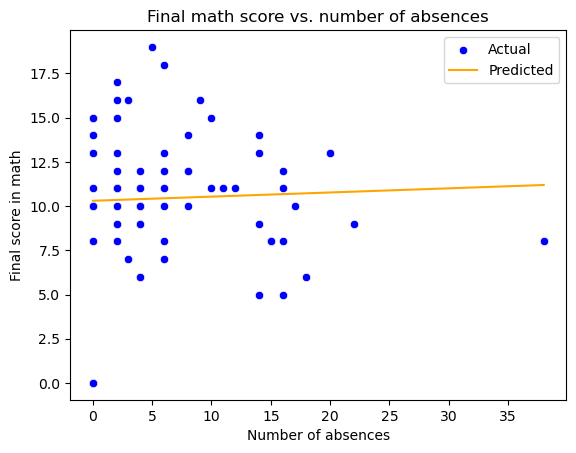

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[['absences']], df['math_final_grade'], test_size=0.2, random_state=1)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(f'Equation: score = {regressor.coef_[0]}*(absences) + {regressor.intercept_}')
print(f'R^2 = {regressor.score(X_test, y_test)}')
print(f'Mean absolute error: {metrics.mean_absolute_error(y_test, y_pred)}')

sns.scatterplot(x=X_test.to_numpy()[:, 0], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test.to_numpy()[:, 0], y=y_pred, errorbar=None, color='orange', label='Predicted')
plt.xlabel('Number of absences')
plt.ylabel('Final score in math')
plt.title('Final math score vs. number of absences')
plt.show()

In [8]:
predictors = ['age', 'mother_education_level', 'father_education_level', 'travel_time',
              'study_time', 'failures', 'family_relationship_quality', 'free_time',
              'time_spent_with_friends', 'workday_alcohol_consumption',
              'weekend_alcohol_consumption', 'health', 'absences']

X_train, X_test, y_train, y_test = train_test_split(df[predictors], df['math_final_grade'], test_size=0.2, random_state=1)

In [9]:
select_reg = make_pipeline(
    SelectKBest(f_regression, k=2),
    LinearRegression()
)
model = select_reg.fit(X_train, y_train)
# Get the objects for each of the underlying steps
selector: SelectKBest = select_reg.named_steps['selectkbest']
regressor: LinearRegression = select_reg.named_steps['linearregression']

# Get the selected features
features = selector.get_feature_names_out(selector.feature_names_in_)
print('Selected features:', features)

X_test_filtered = selector.transform(X_test)
y_pred = select_reg.predict(X_test)

m1, m2 = regressor.coef_
b = regressor.intercept_
print(f'Equation: score = {m1}*({features[0]}) + {m2}*({features[1]}) + {b}')
print('R^2 =', select_reg.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

Selected features: ['mother_education_level' 'failures']
Equation: score = 0.6565644544715347*(mother_education_level) + -2.1564295354787713*(failures) + 9.263323445678564
R^2 = 0.18151276881903755
MAE: 2.493620181531239


Text(0.5, 0.92, "Math final score vs. mother's education level and number of class failures")

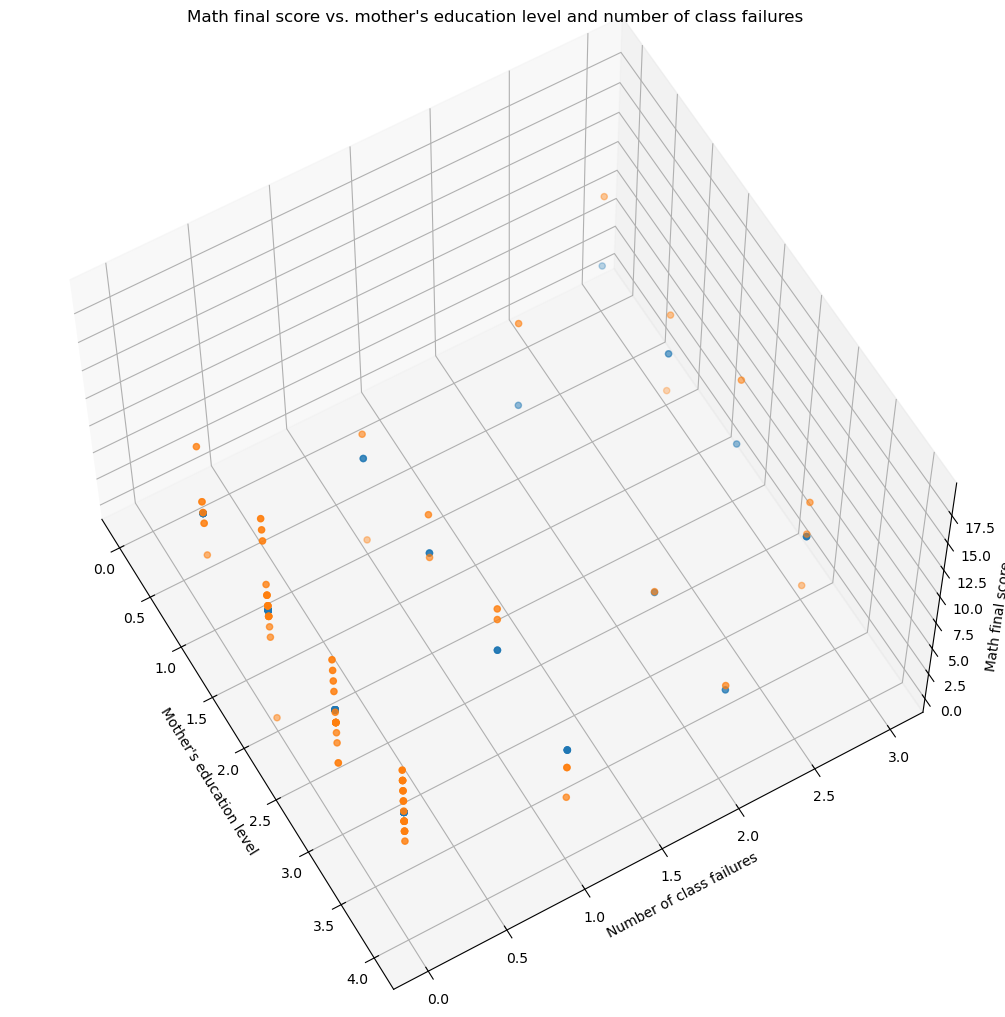

In [10]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='3d'))
ax.view_init(60, -30)
fig.tight_layout()

ax.scatter(X_test_filtered[:, 0], X_test_filtered[:, 1], y_pred)
ax.scatter(X_test_filtered[:, 0], X_test_filtered[:, 1], y_test)
ax.set_xlabel('Mother\'s education level')
ax.set_ylabel('Number of class failures')
ax.set_zlabel('Math final score')
ax.set_title('Math final score vs. mother\'s education level and number of class failures')

Text(0.5, 0.92, "Math final score vs. mother's education level and number of class failures")

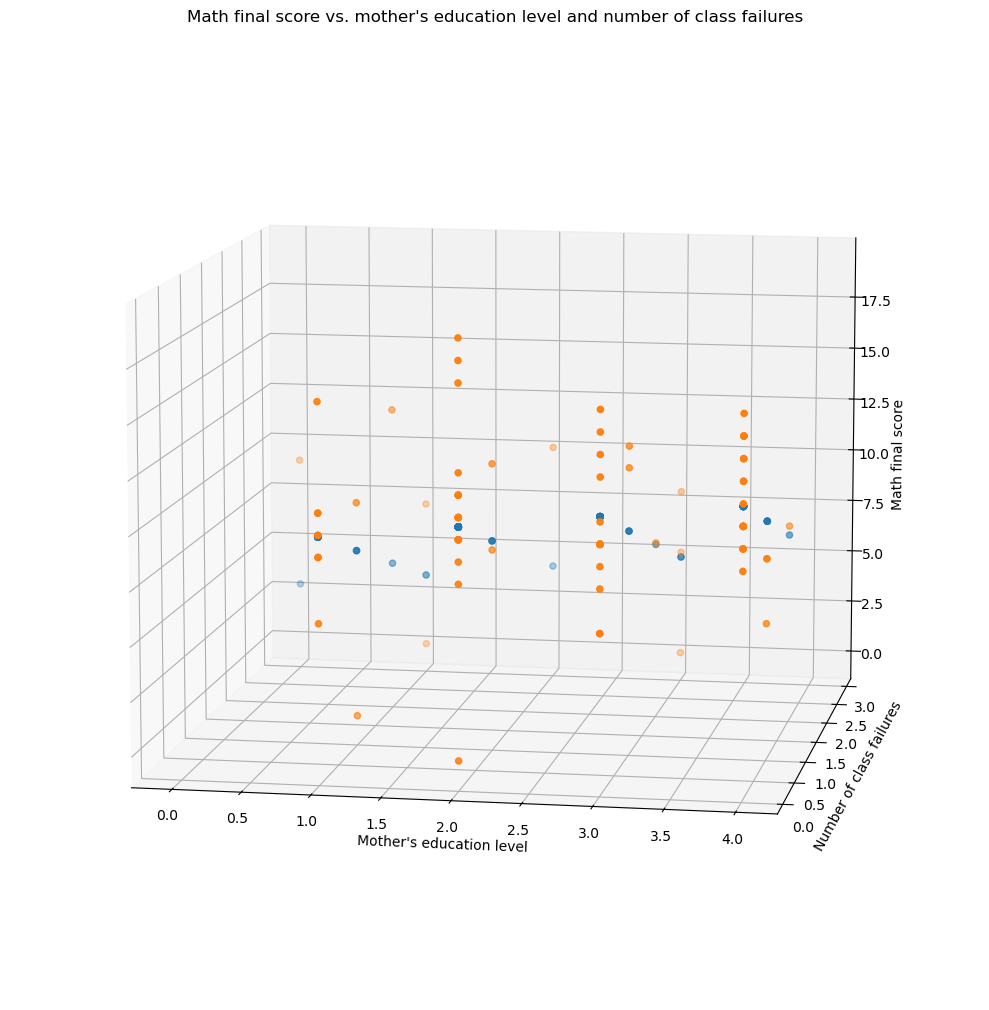

In [11]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='3d'))
ax.view_init(10, -80)
fig.tight_layout()

ax.scatter(X_test_filtered[:, 0], X_test_filtered[:, 1], y_pred)
ax.scatter(X_test_filtered[:, 0], X_test_filtered[:, 1], y_test)
ax.set_xlabel('Mother\'s education level')
ax.set_ylabel('Number of class failures')
ax.set_zlabel('Math final score')
ax.set_title('Math final score vs. mother\'s education level and number of class failures')

Text(0.5, 0.92, "Math final score vs. mother's education level and number of class failures")

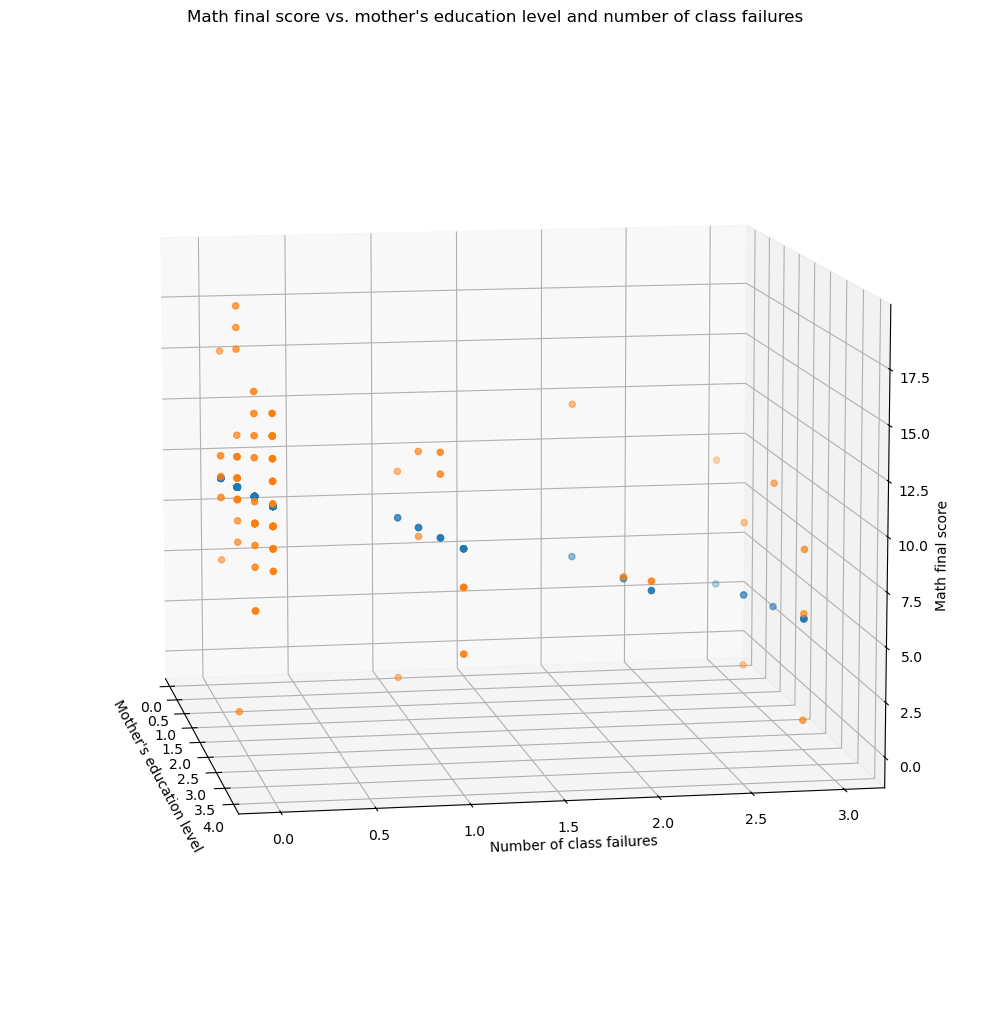

In [12]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='3d'))
ax.view_init(10, -10)
fig.tight_layout()

ax.scatter(X_test_filtered[:, 0], X_test_filtered[:, 1], y_pred)
ax.scatter(X_test_filtered[:, 0], X_test_filtered[:, 1], y_test)
ax.set_xlabel('Mother\'s education level')
ax.set_ylabel('Number of class failures')
ax.set_zlabel('Math final score')
ax.set_title('Math final score vs. mother\'s education level and number of class failures')

In [13]:
fscores, _ = f_regression(X_train, y_train)
predictors_and_scores = [(predictor, score) for predictor, score in zip(predictors, fscores)]
for predictor, score in sorted(predictors_and_scores, key=lambda x: x[1], reverse=True):
    print(f'{predictor}: {score}')

failures: 43.084614526850885
mother_education_level: 17.041313276399144
age: 11.810105594372173
travel_time: 8.745458708678843
father_education_level: 8.404708237297294
study_time: 5.601650224448558
time_spent_with_friends: 3.3885483549489606
family_relationship_quality: 1.0178979807620776
weekend_alcohol_consumption: 0.7080856672696576
health: 0.7030520133155665
free_time: 0.6882638998981437
workday_alcohol_consumption: 0.5305247162989127
absences: 0.5162214887469694
